In [6]:
import os
os.listdir()


['.DHL FACILITY DATA ANALYSIS.ipynb.layout',
 '.ipynb_checkpoints',
 'DHL FACILITY DATA ANALYSIS.ipynb']

In [7]:
import pandas as pd
df = pd.read_csv("DHL_Facilities.csv")
df.head()


,X,Y,OBJECTID,FEATURE_ID,NAME,ADDRESS,ADDRESS2,CITY,STATE,ZIP,LATITUDE,LONGITUDE,MATCH_STATUS,PLACEMENT,CENSUS_CODE,LAST_PICKUP,LOCATION_TY,LOCATION_TH
0,-1.120834e+07,5.030051e+06,1,2093,DHL STATION,5120 EAST LEE BIRD RD,NOT AVAILABLE,NORTH PLATTE,NE,69101,41.119952,-100.686217,OK,On Road,Not Available,3:00 Pm [M-F]\r\nno Sat Pickup,Drop Box,Drop Box and Drop Off Facility
1,-8.043436e+06,5.299085e+06,2,2293,PC CONNECTION,450 MARLBORO ST,NOT AVAILABLE,KEENE,NH,3431,42.915280,-72.255417,OK,Not Available,330059711001024,6:30 Pm [M-F]\r\nno Sat Pickup,Drop Box,Drop Box and Drop Off Facility
2,-8.045972e+06,5.301971e+06,3,2294,20 CENTRAL SQ,20 CENTRAL SQ,NOT AVAILABLE,KEENE,NH,3431,42.934262,-72.278195,OK,Not Available,330059713003015,5:00 Pm [M-F]\r\nno Sat Pickup,Drop Box,Drop Box and Drop Off Facility
3,-8.046142e+06,5.301455e+06,4,2299,SHIPPING SHACK,63 EMERALD ST,NOT AVAILABLE,KEENE,NH,3431,42.930868,-72.279720,OK,Not Available,330059714011009,5:00 Pm [M-F]\r\nno Sat Pickup,DHL Authorized Shipping Center,DHL Authorized Shipping Center
4,-8.053022e+06,5.367961e+06,5,2597,CLAREMONT LOCK & KEY,159 PLEASANT ST,NOT AVAILABLE,CLAREMONT,NH,3743,43.366740,-72.341526,OK,Not Available,330199759022015,3:00 Pm [M-F]\r\n12:00 Pm [Sat],DHL Authorized Shipping Center,DHL Authorized Shipping Center


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(pd.__version__)


2.3.3


In [9]:
df = pd.read_csv("DHL_Facilities.csv")
df.head()


,X,Y,OBJECTID,FEATURE_ID,NAME,ADDRESS,ADDRESS2,CITY,STATE,ZIP,LATITUDE,LONGITUDE,MATCH_STATUS,PLACEMENT,CENSUS_CODE,LAST_PICKUP,LOCATION_TY,LOCATION_TH
0,-1.120834e+07,5.030051e+06,1,2093,DHL STATION,5120 EAST LEE BIRD RD,NOT AVAILABLE,NORTH PLATTE,NE,69101,41.119952,-100.686217,OK,On Road,Not Available,3:00 Pm [M-F]\r\nno Sat Pickup,Drop Box,Drop Box and Drop Off Facility
1,-8.043436e+06,5.299085e+06,2,2293,PC CONNECTION,450 MARLBORO ST,NOT AVAILABLE,KEENE,NH,3431,42.915280,-72.255417,OK,Not Available,330059711001024,6:30 Pm [M-F]\r\nno Sat Pickup,Drop Box,Drop Box and Drop Off Facility
2,-8.045972e+06,5.301971e+06,3,2294,20 CENTRAL SQ,20 CENTRAL SQ,NOT AVAILABLE,KEENE,NH,3431,42.934262,-72.278195,OK,Not Available,330059713003015,5:00 Pm [M-F]\r\nno Sat Pickup,Drop Box,Drop Box and Drop Off Facility
3,-8.046142e+06,5.301455e+06,4,2299,SHIPPING SHACK,63 EMERALD ST,NOT AVAILABLE,KEENE,NH,3431,42.930868,-72.279720,OK,Not Available,330059714011009,5:00 Pm [M-F]\r\nno Sat Pickup,DHL Authorized Shipping Center,DHL Authorized Shipping Center
4,-8.053022e+06,5.367961e+06,5,2597,CLAREMONT LOCK & KEY,159 PLEASANT ST,NOT AVAILABLE,CLAREMONT,NH,3743,43.366740,-72.341526,OK,Not Available,330199759022015,3:00 Pm [M-F]\r\n12:00 Pm [Sat],DHL Authorized Shipping Center,DHL Authorized Shipping Center


In [10]:
df.shape

(24072, 18)

In [11]:
df.describe()

,X,Y,OBJECTID,FEATURE_ID,ZIP,LATITUDE,LONGITUDE
count,2.407200e+04,2.407200e+04,24072.000000,24072.000000,24072.000000,24072.000000,24072.000000
mean,-1.001516e+07,4.504405e+06,12036.500000,12036.816426,48782.274634,37.295641,-89.967749
std,1.644021e+06,7.143163e+05,6949.132176,6949.506833,28163.535248,5.128487,14.768493
min,-1.773961e+07,2.230536e+06,1.000000,1.000000,1001.000000,19.640879,-159.357662
25%,-1.075899e+07,3.990164e+06,6018.750000,6018.750000,28034.750000,33.711759,-96.649631
50%,-9.496394e+06,4.690440e+06,12036.500000,12036.500000,45219.000000,38.781629,-85.307562
75%,-8.915677e+06,5.031130e+06,18054.250000,18055.250000,75234.000000,41.127257,-80.090890
max,-7.551491e+06,9.569101e+06,24072.000000,24073.000000,99801.000000,64.850494,-67.836195


In [12]:
#To create various graphs and charts to highlight the insights and visualizations. 
#1. City-wise No of Pickups made? 
#2. City-wise No of Objects serviced? 
#3. State-wise No of Cities, where DHFL Services are provided? 
#4. Total Number of Objects IDs Serviced by DHFL - Summary Card 
#5. Zip Code wise Number of Objects Serviced?  
#6. Location Th Filters 
#7. Top Contributor Cities? - Geo Map display 

<Axes: xlabel='CITY'>

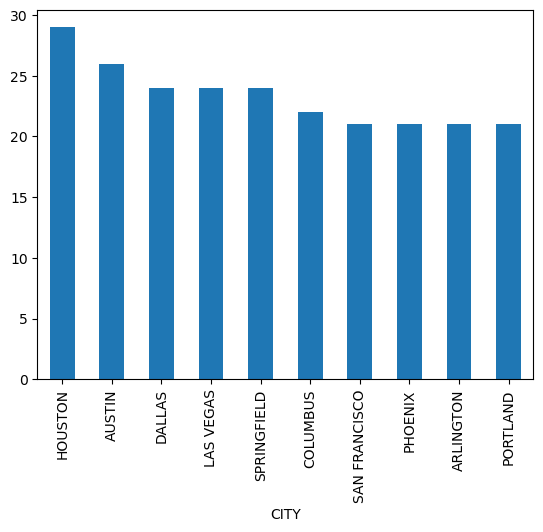

In [13]:
#Top 10 City-wise number of pickups made
city_object=df.groupby('CITY').nunique()['LAST_PICKUP']
city_object.sort_values(ascending=False)[:10].plot.bar()

In [14]:
df.dtypes

X               float64
Y               float64
OBJECTID          int64
FEATURE_ID        int64
NAME             object
ADDRESS          object
ADDRESS2         object
CITY             object
STATE            object
ZIP               int64
LATITUDE        float64
LONGITUDE       float64
MATCH_STATUS     object
PLACEMENT        object
CENSUS_CODE      object
LAST_PICKUP      object
LOCATION_TY      object
LOCATION_TH      object
dtype: object

<Axes: xlabel='STATE'>

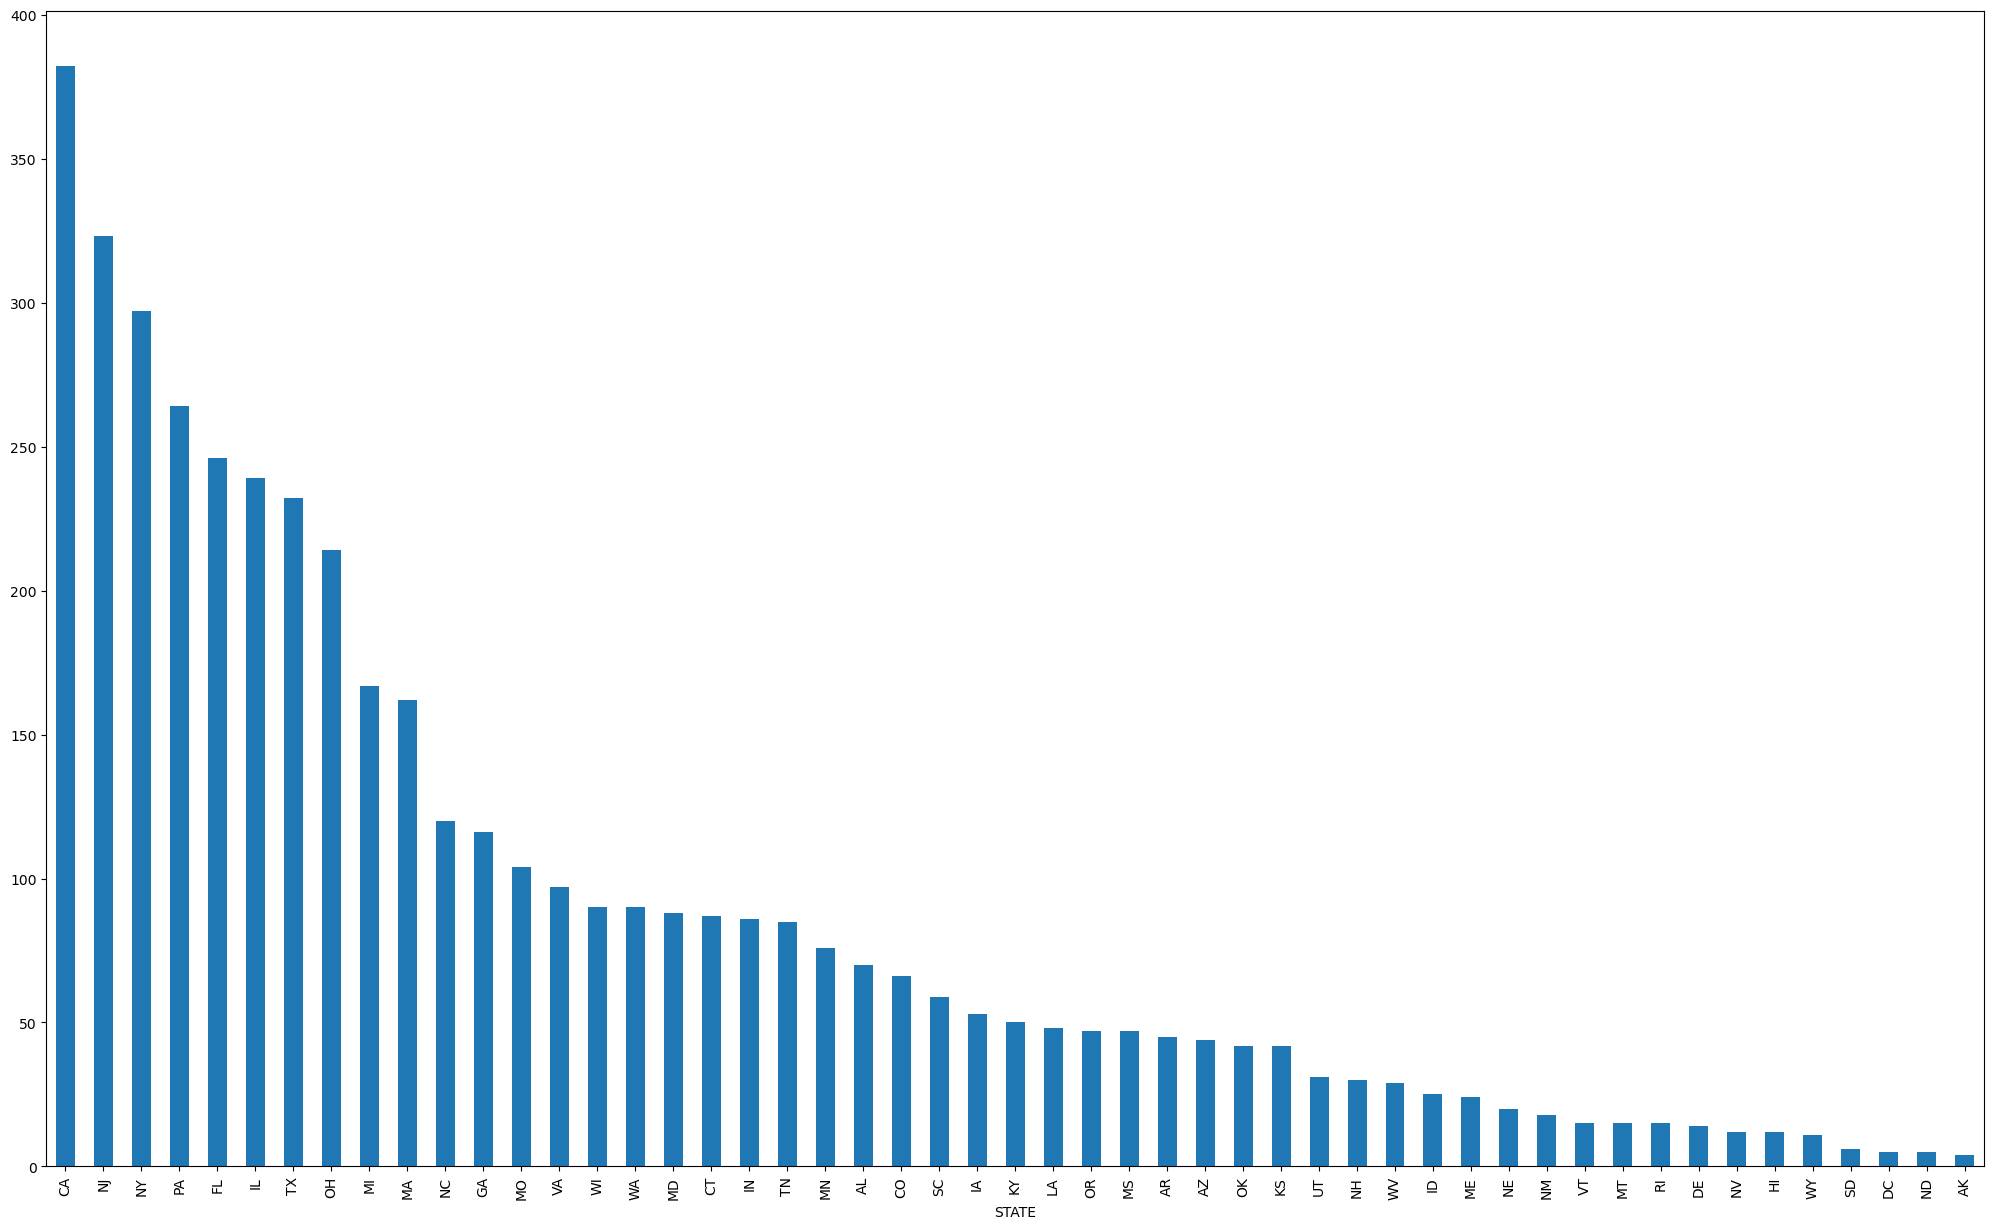

In [15]:
#State-wise No of Cities, where DHFL Services are provided? 
state_city = df.groupby('STATE').nunique()['CITY']
state_city.sort_values(ascending=False).plot.bar(figsize=(25,15))

<Axes: ylabel='CITY'>

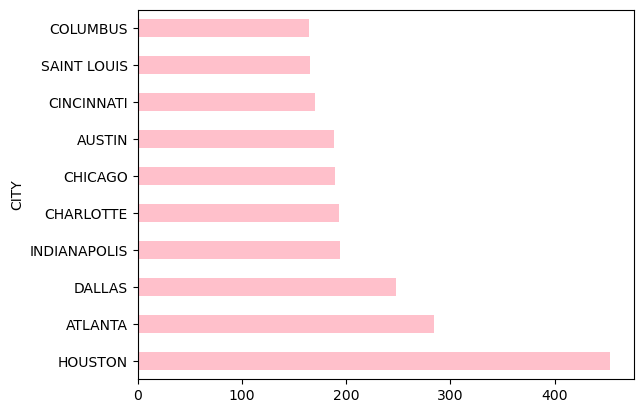

In [16]:
#Top 10 City-wise No of Objects serviced?
city_object=df.groupby('CITY').nunique()['OBJECTID']
city_object.sort_values(ascending=False)[:10].plot.barh(color='PINK')

In [17]:
#Total Number of Objects IDs Serviced by DHFL
df.nunique()['OBJECTID']

np.int64(24072)

In [18]:
#Zip Code wise Number of Objects Serviced
df.groupby('ZIP').nunique()['OBJECTID'].sort_values(ascending=False).head(10)

ZIP
43215    44
30339    41
45202    40
30328    33
48034    31
60515    30
60173    30
78759    30
28217    29
63141    29
Name: OBJECTID, dtype: int64

In [19]:
loc=df.groupby('LOCATION_TH')
s1 = len(df[df['LOCATION_TH']=='DHL Staffed Facility'])
s2 = len(df[df['LOCATION_TH']=='DHL Authorized Shipping Center'])
s3 = len(df[df['LOCATION_TH']=='Drop Box and Drop Off Facility'])

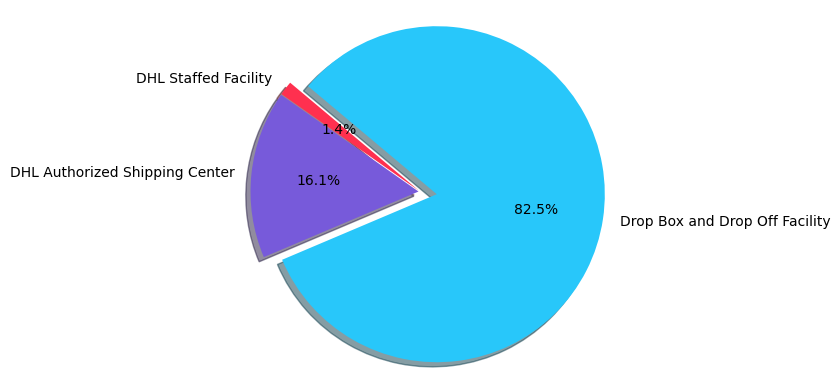

In [20]:
#Location_th filter 
labels = 'DHL Staffed Facility','DHL Authorized Shipping Center','Drop Box and Drop Off Facility'
sizes = [s1,s2,s3]
colors = ['#ff304f','#775ada','#28c7fa']
explode = (0.01,0.01,0.1)
#Plot
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)
plt.axis('equal')
plt.show()
